# Introduction to `networkx`

:::{note}
This material is mostly adapted from the following resources:
- [Data Science for Energy System Modelling: Introduction to networkx](https://fneum.github.io/data-science-for-esm/07-workshop-networkx.html)
:::

**NetworkX: Network Analysis in Python**

<img src="https://networkx.org/_static/networkx_logo.svg" width="400px" />

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Main features:

- Data structures for graphs
- Many standard graph algorithms
- Network structure and analysis measures

:::{note}
Documentation for this package is available at https://networkx.github.io/.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install the following packages by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install numpy networkx pandas matplotlib
```
:::

In [1]:
import warnings

warnings.filterwarnings("ignore")

Let's perform some network analysis on this simple graph:

<img src="https://raw.githubusercontent.com/fneum/data-science-for-esm/main/data-science-for-esm/network.png" width="300px" />

## Network Analysis with `numpy`.

In [2]:
import numpy as np

Say we want to calculate the so-called *Laplacian* $L$ of this graph based on its incidence
matrix $K$, which is an $N\times N$ matrix defined as $L=KK^\top$ for an
undirected graph. The Laplacian matrix of a graph is a representation that
captures the connectivity and structure of the graph by quantifying the
difference between the degree of each vertex and the adjacency relationships
with its neighbouring vertices. We first need to write down the incidence matrix
$K$ as a `np.array`. Let's also use the convention that edges are oriented such
that they are directed at the node with the higher label value (i.e. from node 1
to node 2, not vice versa).

In [3]:
K = np.array(
    [
        [1, -1, 0, 0],
        [1, 0, -1, 0],
        [0, 1, -1, 0],
        [0, 0, 1, -1],
    ]
).T
K

array([[ 1,  1,  0,  0],
       [-1,  0,  1,  0],
       [ 0, -1, -1,  1],
       [ 0,  0,  0, -1]])

In [4]:
L = K.dot(K.T)
L

array([[ 2, -1, -1,  0],
       [-1,  2, -1,  0],
       [-1, -1,  3, -1],
       [ 0,  0, -1,  1]])

This is all fine for small graphs, but inconvient for larger graphs. Let's take the help some Python packages have to offer...

## Making our life easier with `networkx`

First, let's import the library. It is commonly imported under the alias `nx`.

In [5]:
import networkx as nx

This is how we can create an empty graph with no nodes and no edges.

In [6]:
G = nx.Graph()

### Nodes

We can add one node at a time,

In [7]:
G.add_node(1)

with attributes

In [8]:
G.add_node(2, country="DE")

or add nodes from a list

In [9]:
G.add_nodes_from([3, 4])

We can also add nodes along with node attributes if your container yields 2-tuples of the form `(node, node_attribute_dict)`:

In [10]:
G.add_nodes_from(
    [
        (5, {"color": "red"}),
        (6, {"color": "green"}),
    ]
)

### Links (which are also called Edges)

`G` can also be grown by adding one edge at a time,

In [11]:
G.add_edge(1, 2)

even with attributes

In [12]:
G.add_edge(3, 4, weight=2)

or by adding a list of edges,

In [24]:
G.add_edges_from([(1, 3), (2, 5)])

or as a 3-tuple with 2 nodes followed by an edge attribute dictionary

In [14]:
G.add_edges_from([(2, 3, {"weight": 3})])

### Examining elements of a graph

We can examine the nodes and edges.

In [15]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [16]:
G.number_of_nodes()

6

In [17]:
G.edges

EdgeView([(1, 2), (1, 3), (2, 5), (2, 3), (3, 4)])

In [18]:
G.number_of_edges()

5

### Accessing graph elements

Access an edge:

In [19]:
G.edges[2, 3]

{'weight': 3}

Access an attribute of an edge:

In [20]:
G.edges[2, 3]["weight"]

3

Find all neighbours of node 1:

In [21]:
G[1]

AtlasView({2: {}, 3: {}})

### Removing elements

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `G.remove_node()`, `G.remove_nodes_from()`, `G.remove_edge()` and `G.remove_edges_from()`, e.g.

In [22]:
G.remove_node(5)

In [25]:
G.remove_edge(2, 5)

NB: Removing a node will also remove all adjacent edges!

You can remove all nodes and edges with

In [26]:
# G.clear()

### Visualising graphs

A basic drawing function for networks is also available in `networkx`

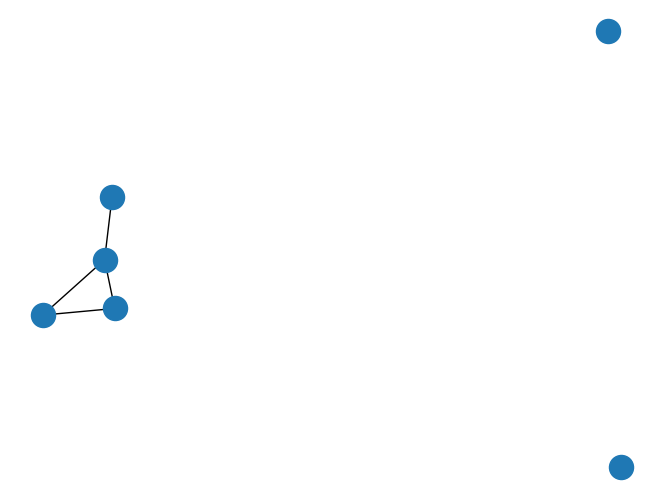

In [27]:
nx.draw(G)

with options for labeling graph elements

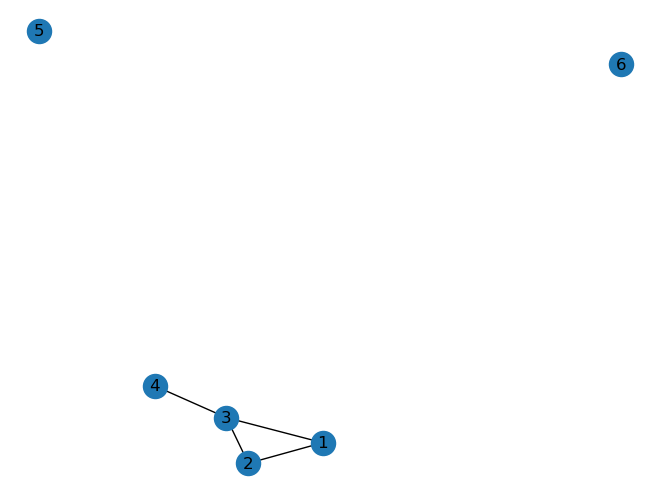

In [28]:
nx.draw(G, with_labels=True)

and integration to `matplotlib`

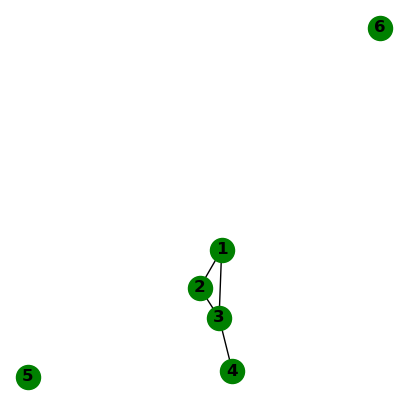

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(G, with_labels=True, ax=ax, node_color="green", font_weight="bold")
plt.savefig("tmp.png")

:::{note}
For a full list of arguments of the function see
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
:::

### Analysing graphs

The `networkx` library comes with many functions to analyse graphs. Here are a few examples that we can use for linearised power flow calculations in electricity transmission networks:

Are all nodes in the network connected with each other?

In [30]:
nx.is_connected(G)

False

What are the components that are connected / isolated?

In [31]:
list(nx.connected_components(G))

[{1, 2, 3, 4}, {6}, {5}]

Is the network planar? I.e. can the graph be drawn such that edges don't cross?

In [32]:
nx.is_planar(G)

True

What is the frequency of degrees in the network?

In [33]:
nx.degree_histogram(G)

[2, 1, 2, 1]

In [34]:
import pandas as pd

pd.Series(nx.degree_histogram(G))

0    2
1    1
2    2
3    1
dtype: int64

What is the *adjacency matrix*? (Careful, `networkx` will yield a weighted adjacency matrix by default!)

In [35]:
A = nx.adjacency_matrix(G, weight=None).todense()
A

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

What is the *incidence matrix*? (Careful, `networkx` will yield a incidence matrix without orientation by default!)

In [36]:
nx.incidence_matrix(G, oriented=True).todense()

array([[-1., -1.,  0.,  0.],
       [ 1.,  0., -1.,  0.],
       [ 0.,  1.,  1., -1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

What is the *Laplacian matrix*? (Careful, `networkx` will yield a weighted adjacency matrix by default!)

In [37]:
L = nx.laplacian_matrix(G, weight=None).todense()
L

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0],
       [ 0,  0, -1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int32)

Find a cycle basis (i.e. a collection of independent cycles through which all other cycles can be represented through linear combination):

In [38]:
nx.cycle_basis(G)

[[1, 2, 3]]

This function returns a list of sequences. Each sequence indicates a series of nodes to traverse for the respective cycle.